<h1>Objective</h1>
<h4>Subscription prediction from the given dataset</h4>

##  Download and Prep the Data

Import the modules needed

In [1]:
#Importing libraries needed and set configuration to show max rows & columns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Download the dataset and read it into a dataframe

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
#Load subscription dataset into dataframe
subscription_df = pd.read_csv("dvi-a2-ps9-data.csv") 



First five items in the dataset.

In [3]:
subscription_df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscription
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


Find out how many entries there are in the dataset.

In [4]:
# Explore on the data & print the information
print("Total number of dataset", subscription_df.shape[0])
print("Total number of features", subscription_df.shape[1])

Total number of dataset 41188
Total number of features 21


Clean up data. <br>
Remove unnecessary columns. Mention the reasons.<br>
Show the data.

In [5]:
#replace the unknow with null
subscription_df = subscription_df.replace('unknown', np.nan)

Unknown for categorical varable can't be set with dummmy value, hence we're removing those records

In [6]:
# Check for null entries 
print(subscription_df.isnull().sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
subscription         0
dtype: int64


In [7]:
#drop the null values
subscription_df = subscription_df.dropna()
print("Total number of dataset after cleanup", subscription_df.shape[0])

Total number of dataset after cleanup 30488


In [8]:
#Remove columns which are not needed
subscription_df.drop(columns='contact',inplace=True)
subscription_df.drop(columns='day_of_week',inplace=True)
subscription_df.drop(columns='duration',inplace=True)
print(subscription_df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'month', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'subscription'],
      dtype='object')


<h4>Contact shows the mode which was used for communication to client and it will not directly impact the deposit subscription</h4>
<h4>day_of_week shows the day of the week for communication to client and it will not directly impact the deposit subscription</h4>
<h4>duration shows the time spent for communication to client and it will not directly impact the deposit subscription</h4>

In [9]:
subscription_df.head()

,age,job,marital,education,default,housing,loan,month,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscription
2,28,management,single,university.degree,no,yes,no,jun,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,apr,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,aug,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,jul,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,may,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0


# Visualisation Questions 

### Question 1
<h4>Find the correlation and plot the heat map for the correlation between features.<br><br>
    Write the python code in the below cell to create appropriate visual to perform the above task.
    <h4>Answer in markdown cells below the visual <br><br>
        1.Summarise your findings from the visual.<br>
            2.The reason for selecting the chart type you did <br>
                3.Mention the pre-attentive attributes used.(atleast 2)<br>
                    4.Mention the gestalt principles used.(atleast 2)<br>
   

In [10]:
#correlation feature for numeric values
numeric_feature =  subscription_df.select_dtypes(include=[np.number])
numeric_feature.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'subscription'],
      dtype='object')

In [11]:
#target variable identified as - subscription
correlation = numeric_feature.corr()
print(correlation['subscription'].sort_values(ascending=False),'\n')

subscription      1.000000
previous          0.228003
cons_conf_idx     0.061638
age               0.048727
campaign         -0.069206
cons_price_idx   -0.128752
emp_var_rate     -0.305365
euribor3m        -0.315869
pdays            -0.327509
nr_employed      -0.364230
Name: subscription, dtype: float64 



<AxesSubplot:>

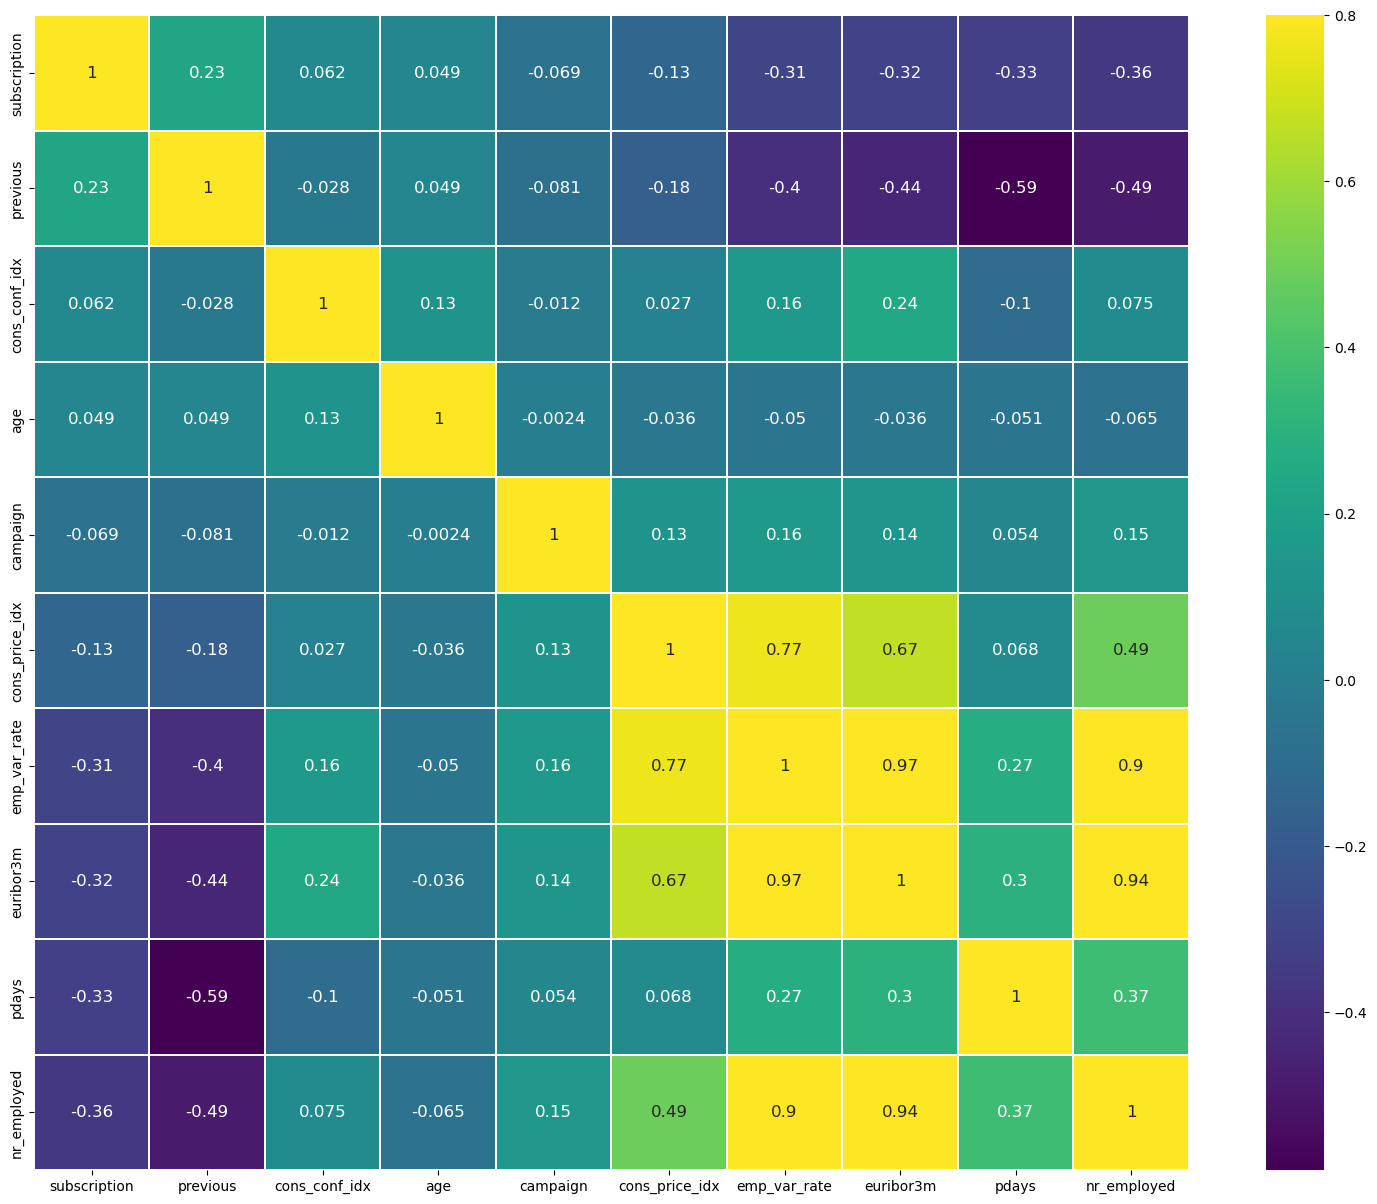

In [12]:
#identified as 10 numeric features
k = 10
cols = correlation.nlargest(k,'subscription')['subscription'].index
#print(cols)
cm = np.corrcoef(subscription_df[cols].values.T)
f , ax = plt.subplots(figsize=(20,15))
sns.heatmap(cm, vmax = .8, linewidths = 0.01, square = True,annot = True, cmap = 'viridis',
            linecolor='white',xticklabels = cols.values, annot_kws = {'size': 12}, yticklabels = cols.values)


### **Question 1 - Answer**
**Summary**

<br>
    From the above correlation heatmap, one could get some of the following information: 

*   Variables such as emp_var_rate & euribor3m, emp_var_rate & nr_employed, emp_var_rate & cons_price_idx and nr_employed & euribor3m are having strong positive correlation. 
According to Pearson correlation coefficient value greater than 0.7 indicates the presence of multi-collinearity.
*   Variables such as pdays & previous, previous & euribor3m, previous & nr_employed, and emp_var_rate & previous are having strong negative correlations.
*   There are several variables that have no correlation and whose correlation value is near 0.

**Chart type**

*   A heat map is a graphical representation of a correlation matrix representing the correlation between different variables.
*   Simplify complex numerical data into visualizations that can be understood at a glance

**Pre-attentive attributes**
*   Volume, density, and color saturation
<br>

**Gestalt principles**
*   Similarity, Focal point and Connection

### Question 2
Find age distribution and Plot histogram graph for this. And check which age group is most likely to subscribe the bank.

Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


[ 864 8509 9760 5710 3335 1731  289  177   85   28]
[17.  24.8 32.6 40.4 48.2 56.  63.8 71.6 79.4 87.2 95. ]


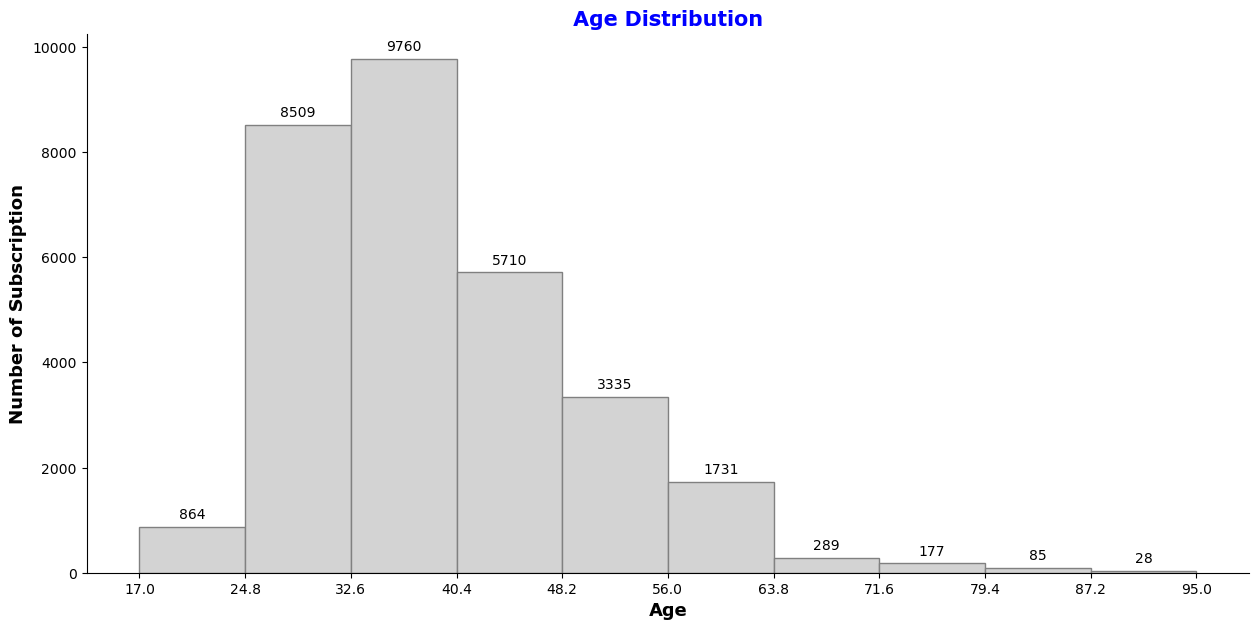

In [13]:
bank_as=subscription_df[['age','subscription']]
bank_as
count,bin_edges=np.histogram(bank_as['age'],bins=10)
print(count) #frequency count
print(bin_edges) # bin ranges, default = 10 bins
age_df= bank_as['age'].plot(kind='hist',xticks=bin_edges,figsize=(15,7),color='lightgrey',edgecolor="grey")
font1 = {'family':'verdana','color':'blue','size':15,'fontweight':'bold'}
font2 = {'family':'verdana','color':'Black','size':13,'fontweight':'bold'}
plt.title('Age Distribution',fontdict=font1)
plt.ylabel('Number of Subscription',fontdict=font2)
plt.xlabel('Age',fontdict=font2)

for p in age_df.patches:
    age_df.annotate(format(p.get_height(),'0.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

for spine in age_df.spines:
    age_df.spines['top'].set_visible(False)
    age_df.spines['right'].set_visible(False)

### **Question 2 - Answer**
**Summary**

<br>
*   Based on the visual , it can be clearly seen that age 32 to 40 age group is most likely to subscribe the bank and age group 87 to 95 is very unlikely to subscribe the bank.  

**Chart type**

*   Histogram chart is chosen for frequency distribution of a data set which is age in this case.

**Pre-attentive attributes**
*   Color,Length
<br>

**Gestalt principles**
*   Law of Closure, Law of Proximity

### Question 3
Visualize number of contacts made in each month.

Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


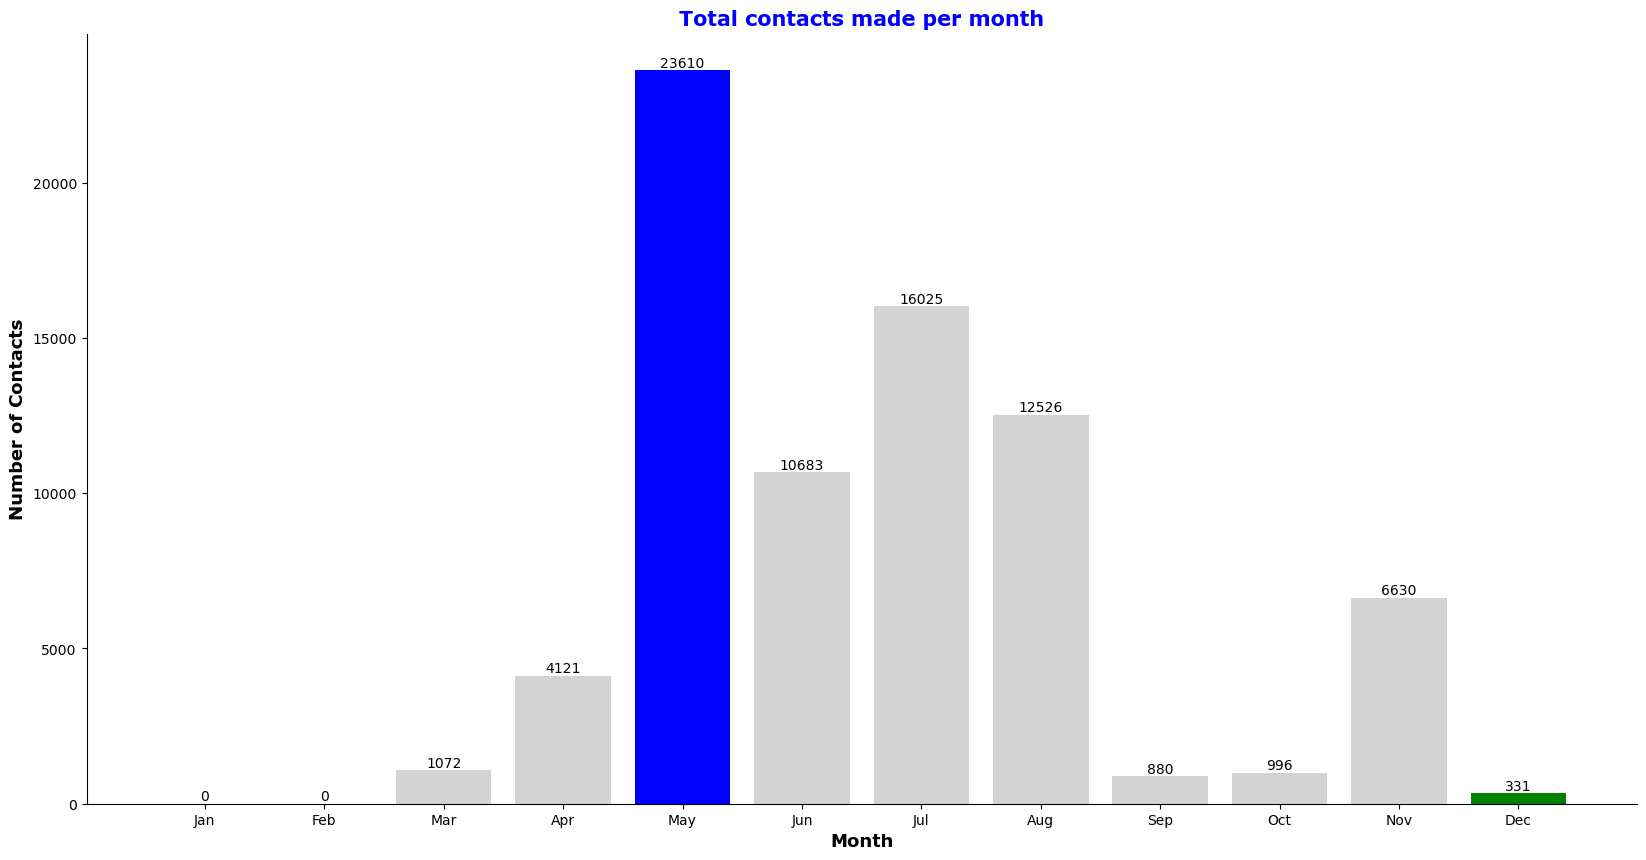

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import array as arr
import matplotlib as mpl

a=arr.array('i',[10,20,30,40,50,60,70,80,90,100,110,120])
b=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
bank_cm=subscription_df[['campaign','month']]

bank_mon1 = bank_cm[bank_cm['month']=='jan'] 
a[0]=bank_mon1[bank_mon1.columns[0]].sum()
bank_mon2 = bank_cm[bank_cm['month']=='feb'] 
a[1]=bank_mon2[bank_mon2.columns[0]].sum()
bank_mon3 = bank_cm[bank_cm['month']=='mar'] 
a[2]=bank_mon3[bank_mon3.columns[0]].sum()
bank_mon4 = bank_cm[bank_cm['month']=='apr'] 
a[3]=bank_mon4[bank_mon4.columns[0]].sum()

bank_mon5 = bank_cm[bank_cm['month']=='may'] 
a[4]=bank_mon5[bank_mon5.columns[0]].sum()

bank_mon6 = bank_cm[bank_cm['month']=='jun'] 
a[5]=bank_mon6[bank_mon6.columns[0]].sum()

bank_mon7 = bank_cm[bank_cm['month']=='jul'] 
a[6]=bank_mon7[bank_mon7.columns[0]].sum()

bank_mon8 = bank_cm[bank_cm['month']=='aug'] 
a[7]=bank_mon8[bank_mon8.columns[0]].sum()

bank_mon9 = bank_cm[bank_cm['month']=='sep'] 
a[8]=bank_mon9[bank_mon9.columns[0]].sum()

bank_mon10 = bank_cm[bank_cm['month']=='oct'] 
a[9]=bank_mon10[bank_mon10.columns[0]].sum()

bank_mon11 = bank_cm[bank_cm['month']=='nov'] 
a[10]=bank_mon11[bank_mon11.columns[0]].sum()

bank_mon12 = bank_cm[bank_cm['month']=='dec'] 
a[11]=bank_mon12[bank_mon12.columns[0]].sum()

fig = plt.figure(figsize = (20, 10))
mpl.rcParams['axes.spines.top'] = 'False'
mpl.rcParams['axes.spines.right'] = 'False'
font1 = {'family':'verdana','color':'blue','size':15,'fontweight':'bold'}
font2 = {'family':'verdana','color':'Black','size':13,'fontweight':'bold'}
b1=plt.bar(b, a, color = ['lightgrey','lightgrey','lightgrey','lightgrey','blue','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','green'], align = 'center' , width=0.8)
plt.title('Total contacts made per month',fontdict=font1) 
plt.ylabel('Number of Contacts',fontdict=font2) 
plt.xlabel('Month',fontdict=font2)

                
for bar1 in b1:
    yval=bar1.get_height()
    plt.text(bar1.get_x()+bar1.get_width()/2.,yval,int(yval),va='bottom',ha='center')



### **Question 3 - Answer**
**Summary**

<br>
*   Based on the visual , it can be clearly seen that In May month the contacts made is the highest i.e. 23610 and in Dec month the number of contacts are lowest i.e. 331. Beginning of the year i.e. Jan & Feb no contacts are made.  

**Chart type**

*   Bar graphs is chosen because its plot based on a common baseline to compare values of categorical variables.They are simple & will show the monthwise contacts without cognitive load

**Pre-attentive attributes**
*   Shape,Color
<br>

**Gestalt principles**
*   Law of Closure, Law of Proximity

### Question 4
Categorize the data by grouping into education divisions and check which sector is more likely to subscribe.

Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


In [15]:
#Define function for crosstab plot
def crosstabplot(subscription_df,feature,target,title,xlabel,ylabel):
    barplot = pd.crosstab(subscription_df[feature],subscription_df[target]).plot(kind="bar",figsize=(15,6),color=['lightgrey','blue'])
    font1 = {'family':'verdana','color':'blue','size':15,'fontweight':'bold'}
    font2 = {'family':'verdana','color':'Black','size':13,'fontweight':'bold'}
    plt.title(title,fontdict = font1)
    plt.xlabel(xlabel,fontdict = font2)
    plt.ylabel(ylabel,fontdict = font2)
    plt.legend(["No","Yes"])
    plt.xticks(rotation=0)
    for p in barplot.patches:
        barplot.annotate(p.get_height(), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    for spine in barplot.spines:
        barplot.spines['top'].set_visible(False)
        barplot.spines['right'].set_visible(False)

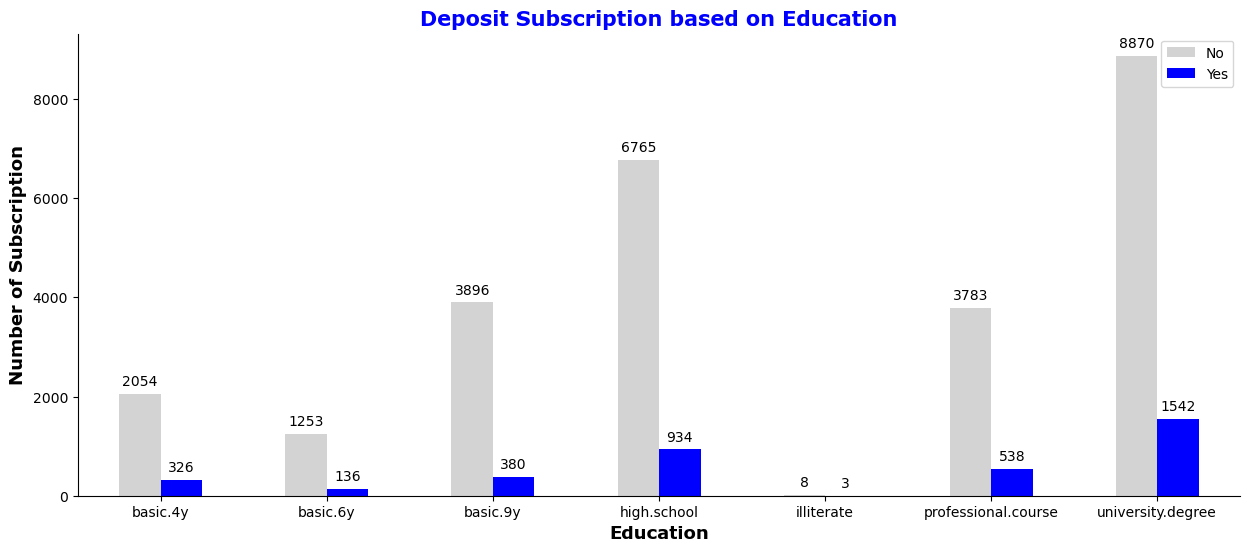

In [16]:
crosstabplot(subscription_df,'education','subscription','Deposit Subscription based on Education','Education','Number of Subscription')


### **Question 4 - Answer**
**Summary**

<br>
*   Based on the visual , it can be clearly seen that university degree,high school, professional course are more likely to subscribe for deposit.  

**Chart type**

*   Crosstab chart is chosen because it can clearly show the relationship between two or more categorical variables. In the above chart , it helps to group data based on education and see visually on the deposit subscription impact  

**Pre-attentive attributes**
*   Length,Color
<br>

**Gestalt principles**
*   Law of Closure, Law of Proximity

### Question 5
Plot the chart to show the total number of clients subscribed to the deposit

Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  

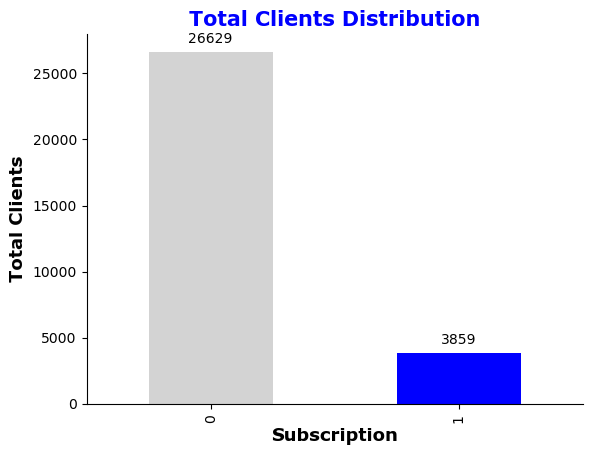

In [17]:
# Total number of clients subscribed to the deposit

df_client = subscription_df['subscription'].value_counts().plot(kind='bar',color=['lightgrey','blue'])
font1 = {'family':'verdana','color':'blue','size':15,'fontweight':'bold'}
font2 = {'family':'verdana','color':'Black','size':13,'fontweight':'bold'}
plt.title('Total Clients Distribution',fontdict = font1)
plt.ylabel('Total Clients',fontdict = font2)
plt.xlabel('Subscription',fontdict=font2)
for p in df_client.patches:
    df_client.annotate(p.get_height(), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
for spine in df_client.spines:
    df_client.spines['top'].set_visible(False)
    df_client.spines['right'].set_visible(False)

### **Question 5 - Answer**
**Summary**

<br>
*   Based on the visual , it can be clearly seen that number of clients subscribed for deposit is 3859(13%) out of 30448 . In the chart, 0 indicates no subscription and 1 indicates subscription.With the entire dataset , deposit subscription seems to be lower.  

**Chart type**

*   Bar chart is chosen because it is plotted on a common baseline to allow for easy comparison of values of categorical variables. Here in this case its visually easy to get the total number of clients subscribed to deposit.

**Pre-attentive attributes**
*   Length,Color
<br>

**Gestalt principles**
*   Law of Closure, Law of Proximity

# Group's choice-2 Marks
 
#### Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual.
 
 1. Write the question in a markdown cell
 2. Below the question,in a coding cell,write the python code to create the visual to answer the question  

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   2.The reason for selecting the chart type you did <br>
   3.Mention the pre-attentive attributes used.(atleast 2)<br>
   4.Mention the gestalt principles used.(atleast 2)<br>
  

<h3>Answer for Group's Choice </h3>

<h3> Question </h3>
<h4> How previous promotional campaign that succeed have impact on the deposit subscription </h4>


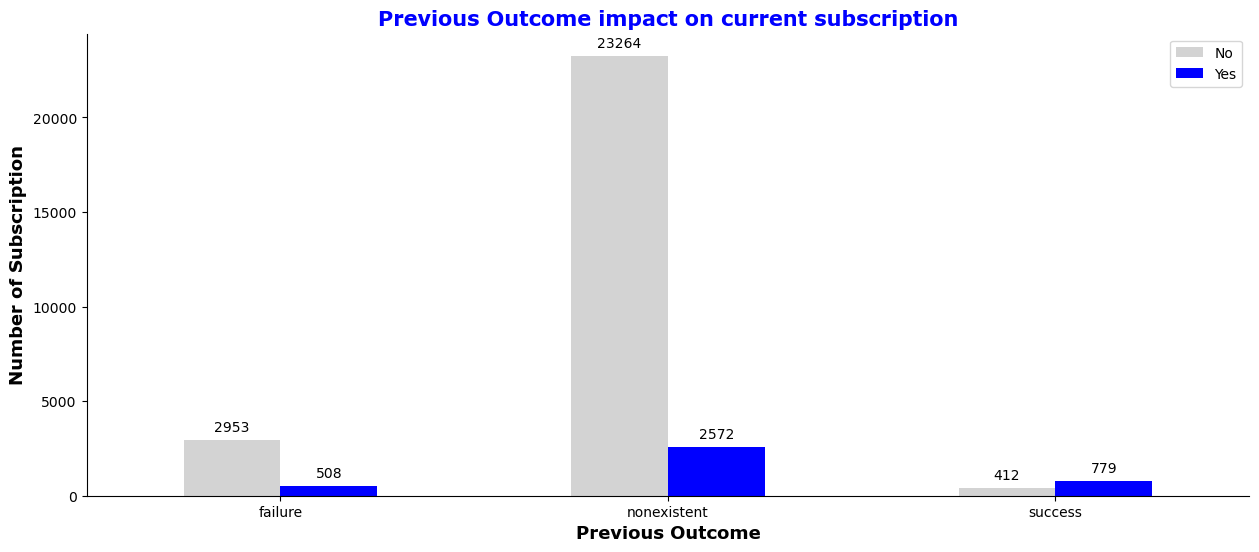

In [18]:
crosstabplot(subscription_df,'poutcome','subscription','Previous Outcome impact on current subscription','Previous Outcome','Number of Subscription')

### **Group's Choice - Answer**
**Summary**

<br>
*  Based on the visual , it can be clearly seen that out of 1191 success subscription based on campaign, nearly 65% (779) subscribed this time as well. It clearly indicates that previous campaign have definite impact on the current deposit subscription . 

**Chart type**

*   Crosstab chart is chosen because it can clearly show the relationship between two or more categorical variables. In the above chart , it helps to group data based on previous outcome and see visually on the deposit subscription impact.

**Pre-attentive attributes**
*   Length,Color
<br>

**Gestalt principles**
*   Law of Closure, Law of Proximity

<h1><center> ************ END OF ASSIGNMENT ****************</center></h1>